In [1]:
#On se positionne sur le dossier que l'on veut et clonage de darknet
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4
!git clone https://github.com/AlexeyAB/darknet


/
Mounted at /content/gdrive
/content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4
fatal: destination path 'darknet' already exists and is not an empty directory.


In [2]:
#Edit du makefile et compilation du makefile
%cd /content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet

!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

!/usr/local/cuda/bin/nvcc --version

!make
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

/content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_o

In [ ]:
# define helper functions

def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files

def upload():
  from google.colab import files
  uploaded = files.upload() 

  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  

def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
%ls cfg/

yolov4-tiny-custom.cfg


/content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x

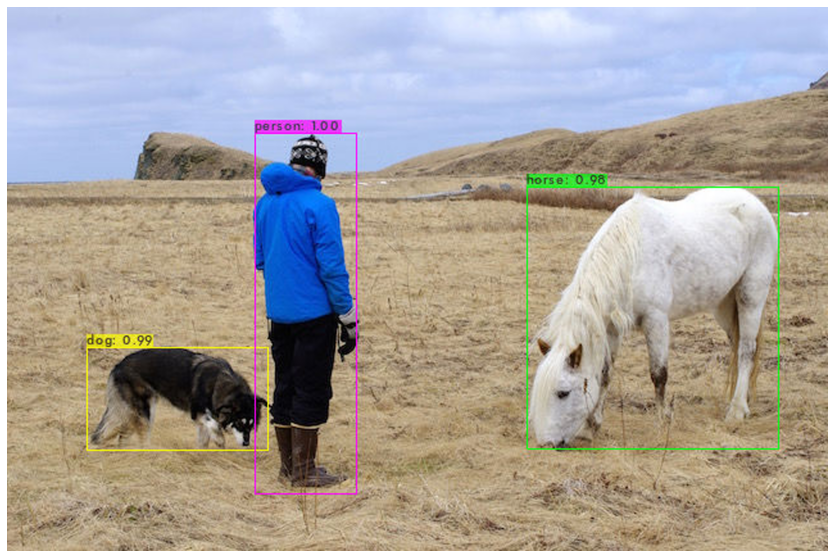

In [ ]:
#Test pour voir si ça marche
%cd /content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg
imShow('predictions.jpg')

In [ ]:
#Creation du fichier train
import os

for file in os.listdir("/content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet/data/obj/train"):
    if file.endswith(".jpg"):
        fichier = open("/content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet/data/obj/train.txt", "a")
        fichier.write( "/content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet/data/obj/train/" + file + "\n")
        fichier.close()

In [ ]:
#Creation du fichier test
import os

for file in os.listdir("/content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet/data/obj/test"):
    if file.endswith(".jpg"):
        fichier = open("/content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet/data/obj/test.txt", "a")
        fichier.write( "/content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet/data/obj/test/" + file + "\n")
        fichier.close()

In [ ]:
#Entrainement
%cd /content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet/
!./darknet detector train data/obj/obj.data yolo-obj.cfg yolov4.conv.137 -dont_show

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 total_bbox = 26926, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.274346), count: 34, class_loss = 1424.790894, iou_loss = 10.328491, total_loss = 1435.119385 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.405004), count: 31, class_loss = 378.221588, iou_loss = 2.212402, total_loss = 380.433990 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.336421), count: 7, class_loss = 92.905983, iou_loss = 0.122917, total_loss = 93.028900 
 total_bbox = 26998, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.286192), count: 36, class_loss = 1418.041138, iou_loss = 12.873901, total_loss = 1430.915039 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.371526), count: 35, class_loss = 377.941

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv 

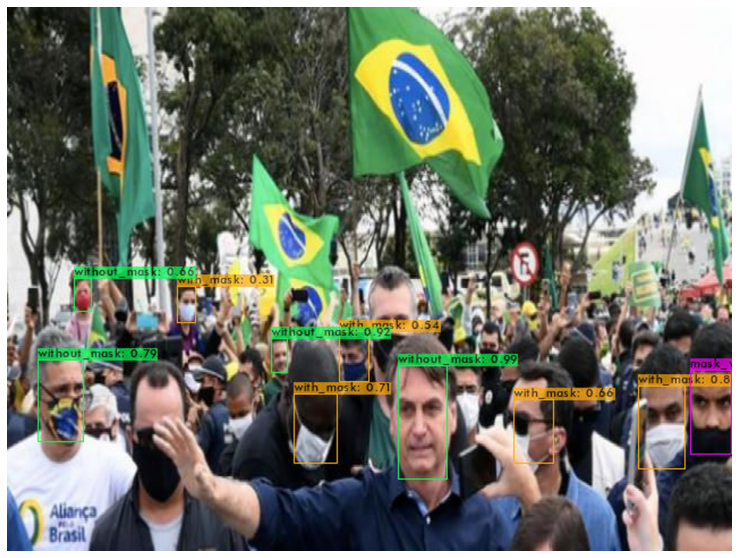

In [ ]:
#voir le résultat du premier entrainement
!./darknet detector test data/obj/obj.data yolo-obj.cfg backup/yolo-obj_last.weights data/obj/test/034141e9234273a7f392a9b985d3a1a1099677b4_png_2b9dfb4da3a153ba621d27d8d68d50b8.jpg

imShow('predictions.jpg')

In [ ]:
#Ligne qui reprend l'entrainement à partir du fichier dans bakcup généré (en génère un au bout de 100 epoch) 
#Au minimum 6000 epoch (3 classes -> 2000 par classes)
%cd /content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet/
!./darknet detector train data/obj/obj.data yolo-obj.cfg backup/yolo-obj_last.weights -dont_show  #reprendre l'entrainement : penser à modifier le nom du fichier des poids


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 total_bbox = 471045, rewritten_bbox = 0.002972 % 

 5926: 1.605540, 1.265600 avg loss, 0.000010 rate, 24.416211 seconds, 379264 images, 0.779004 hours left
Loaded: 0.000078 seconds
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.821642), count: 18, class_loss = 0.511030, iou_loss = 81.568604, total_loss = 82.079636 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.833444), count: 12, class_loss = 0.132691, iou_loss = 8.047798, total_loss = 8.180489 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.864357), count: 4, class_loss = 0.005824, iou_loss = 0.402216, total_loss = 0.408040 
 total_bbox = 471079, rewritten_bbox = 0.002972 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.855426), count: 2, class_loss = 0.003293, iou_loss = 1.711291, total_loss = 1.714584 
v3 (iou l

In [3]:
%cd /content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet/

# import darknet functions to perform object detections
from darknet import *
# load in our YOLOv4 architecture network
network, class_names, class_colors = load_network("yolo-obj.cfg", "data/obj/obj.data", "backup/yolo-obj_final.weights")
width = network_width(network)
height = network_height(network)

# darknet helper function to run detection on image
def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)

  # get image ratios to convert bounding boxes to proper size
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height

  # run model on darknet style image to get detections
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

/content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet


In [4]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [5]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [6]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # call our darknet helper on video frame
    detections, width_ratio, height_ratio = darknet_helper(frame, width, height)

    # loop through detections and draw them on transparent overlay image
    for label, confidence, bbox in detections:
      left, top, right, bottom = bbox2points(bbox)
      left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
      bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), class_colors[label], 2)
      bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[label], 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

In [ ]:
#Ligne qui reprend l'entrainement à partir du fichier dans bakcup généré (en génère un au bout de 100 epoch) 
#Au minimum 6000 epoch (3 classes -> 2000 par classes)
%cd /content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet/
!./darknet detector demo data/obj/obj.data yolo-obj.cfg backup/yolo-obj_final.weights 


/content/gdrive/My Drive/ESIREM/5A/SystemeIntelligentAvance/BROUSSE/Projet/test_code/yolov4/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
^C
